In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from tensorflow.keras.callbacks import EarlyStopping


In [30]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [31]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [34]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [35]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dropout(0.5))


In [36]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 4s 8ms/step - loss: 0.4724 - accuracy: 0.2183 - val_loss: 0.0859 - val_accuracy: 0.1565
Epoch 2/30
188/188 [==============================] - 2s 9ms/step - loss: 0.4043 - accuracy: 0.4153 - val_loss: 0.0457 - val_accuracy: 0.1055
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3950 - accuracy: 0.4493 - val_loss: 0.0429 - val_accuracy: 0.0780
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3918 - accuracy: 0.4450 - val_loss: 0.0322 - val_accuracy: 0.0100
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3877 - accuracy: 0.4243 - val_loss: 0.0189 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3825 - accuracy: 0.4503 - val_loss: 0.0241 - val_accuracy: 0.0010
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3807 - accuracy: 0.4563 - val_loss: 0.0208 - val_accuracy: 0.0070
Ep

In [37]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.3826 - accuracy: 0.4567 - val_loss: 0.0130 - val_accuracy: 5.0000e-04
Epoch 2/30
188/188 [==============================] - 1s 8ms/step - loss: 0.3808 - accuracy: 0.4618 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3813 - accuracy: 0.4532 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3777 - accuracy: 0.4565 - val_loss: 0.0288 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3957 - accuracy: 0.3018 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3804 - accuracy: 0.4117 - val_loss: 0.0146 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3836 - accuracy: 0.4422 - val_loss: 0.0131 - val

In [38]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 8ms/step - loss: 0.3814 - accuracy: 0.4723 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3792 - accuracy: 0.4720 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3823 - accuracy: 0.4790 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3815 - accuracy: 0.4697 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3786 - accuracy: 0.4808 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3806 - accuracy: 0.4745 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3857 - accuracy: 0.4643 - val_loss: 0.0094 - val

In [39]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 8ms/step - loss: 0.3837 - accuracy: 0.4660 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3756 - accuracy: 0.4728 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3770 - accuracy: 0.4737 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3825 - accuracy: 0.4633 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3776 - accuracy: 0.4840 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 7ms/step - loss: 0.3811 - accuracy: 0.4783 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 7ms/step - loss: 0.3819 - accuracy: 0.4680 - val_loss: 0.0094 - val

In [40]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 8ms/step - loss: 0.3779 - accuracy: 0.4638 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3833 - accuracy: 0.4640 - val_loss: 0.0173 - val_accuracy: 5.0000e-04
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3836 - accuracy: 0.4752 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 7ms/step - loss: 0.3724 - accuracy: 0.4602 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 8ms/step - loss: 0.3809 - accuracy: 0.4525 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3822 - accuracy: 0.4743 - val_loss: 0.0286 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3795 - accuracy: 0.4700 - val_loss: 0.0088 - val

In [41]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.0000e+00
Test LSTM Loss:  0.010386432521045208
Test LSTM Accuracy:  0.0


In [42]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [43]:
gru_model = Sequential()
gru_model.add(GRU(units=64, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dropout(0.5))


In [44]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 4ms/step - loss: 0.6443 - accuracy: 0.0171 - val_loss: 0.1712 - val_accuracy: 0.0013
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4798 - accuracy: 0.1280 - val_loss: 0.1493 - val_accuracy: 0.0000e+00
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.2461 - val_loss: 0.1403 - val_accuracy: 0.0053
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4610 - accuracy: 0.3299 - val_loss: 0.1352 - val_accuracy: 0.0000e+00
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.3777 - val_loss: 0.1321 - val_accuracy: 0.0000e+00
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4545 - accuracy: 0.3977 - val_loss: 0.1319 - val_accuracy: 0.0013
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.4171 - val_loss: 0.1280 - val_accuracy: 6

In [45]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.4462 - accuracy: 0.4533 - val_loss: 0.1187 - val_accuracy: 0.0020
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.4351 - val_loss: 0.1211 - val_accuracy: 0.0127
Epoch 3/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4456 - accuracy: 0.4489 - val_loss: 0.1186 - val_accuracy: 0.0000e+00
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.4484 - val_loss: 0.1182 - val_accuracy: 6.6667e-04
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.4420 - val_loss: 0.1198 - val_accuracy: 0.0027
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.4564 - val_loss: 0.1192 - val_accuracy: 0.0000e+00
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.4357 - val_loss: 0.1200 - val_accuracy: 0

In [46]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.4427 - accuracy: 0.4446 - val_loss: 0.1189 - val_accuracy: 0.0133
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4488 - accuracy: 0.4416 - val_loss: 0.1190 - val_accuracy: 0.0147
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.4394 - val_loss: 0.1190 - val_accuracy: 0.0153
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.4447 - val_loss: 0.1191 - val_accuracy: 0.0153
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.4427 - val_loss: 0.1192 - val_accuracy: 0.0153
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.4421 - val_loss: 0.1192 - val_accuracy: 0.0153
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4436 - accuracy: 0.4457 - val_loss: 0.1193 - val_accuracy: 0.0153
Epoch 

In [47]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 5ms/step - loss: 0.4450 - accuracy: 0.4521 - val_loss: 0.1195 - val_accuracy: 0.0120
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4458 - accuracy: 0.4491 - val_loss: 0.1195 - val_accuracy: 0.0120
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.4466 - val_loss: 0.1195 - val_accuracy: 0.0120
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.4493 - val_loss: 0.1195 - val_accuracy: 0.0120
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.4503 - val_loss: 0.1195 - val_accuracy: 0.0120
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.4469 - val_loss: 0.1195 - val_accuracy: 0.0120
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.4604 - val_loss: 0.1195 - val_accuracy: 0.0120
Epoch 

In [48]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 4ms/step - loss: 0.4463 - accuracy: 0.4450 - val_loss: 0.1218 - val_accuracy: 0.0127
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.4484 - val_loss: 0.1206 - val_accuracy: 0.0027
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.4319 - val_loss: 0.1226 - val_accuracy: 0.0200
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.4460 - val_loss: 0.1200 - val_accuracy: 0.0093
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.4406 - val_loss: 0.1223 - val_accuracy: 0.0167
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.4369 - val_loss: 0.1199 - val_accuracy: 0.0000e+00
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.4509 - val_loss: 0.1239 - val_accuracy: 0.0033
Ep

In [49]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.0207
Test GRU Loss:  0.12814019620418549
Test GRU Accuracy:  0.020666666328907013


In [50]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [51]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation="relu"))

cnn_model.add(Dropout(0.5))


In [52]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.6038 - accuracy: 0.2539 - val_loss: 0.3395 - val_accuracy: 0.6473
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.8076 - val_loss: 0.3286 - val_accuracy: 0.8447
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.8903 - val_loss: 0.3250 - val_accuracy: 0.9147
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.9144 - val_loss: 0.3217 - val_accuracy: 0.9167
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.9237 - val_loss: 0.3190 - val_accuracy: 0.9080
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.9283 - val_loss: 0.3179 - val_accuracy: 0.9427
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5683 - accuracy: 0.9316 - val_loss: 0.3165 - val_accuracy: 0.9420
Epoch 

In [53]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5469 - accuracy: 0.9420 - val_loss: 0.2875 - val_accuracy: 0.9547
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5477 - accuracy: 0.9430 - val_loss: 0.2855 - val_accuracy: 0.9540
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5462 - accuracy: 0.9426 - val_loss: 0.2840 - val_accuracy: 0.9513
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5473 - accuracy: 0.9453 - val_loss: 0.2860 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5478 - accuracy: 0.9461 - val_loss: 0.2834 - val_accuracy: 0.9520
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5462 - accuracy: 0.9473 - val_loss: 0.2842 - val_accuracy: 0.9540
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.8911 - val_loss: 0.2650 - val_accuracy: 0.8947
Epoch 

In [54]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5300 - accuracy: 0.9484 - val_loss: 0.2516 - val_accuracy: 0.9553
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.9490 - val_loss: 0.2515 - val_accuracy: 0.9553
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.9483 - val_loss: 0.2515 - val_accuracy: 0.9553
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.9483 - val_loss: 0.2514 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.9481 - val_loss: 0.2514 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.9476 - val_loss: 0.2514 - val_accuracy: 0.9540
Epoch 7/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5288 - accuracy: 0.9480 - val_loss: 0.2514 - val_accuracy: 0.9533
Epoch 

In [55]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5275 - accuracy: 0.9460 - val_loss: 0.2516 - val_accuracy: 0.9527
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5269 - accuracy: 0.9461 - val_loss: 0.2516 - val_accuracy: 0.9527
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5269 - accuracy: 0.9463 - val_loss: 0.2516 - val_accuracy: 0.9527
Epoch 4/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5269 - accuracy: 0.9466 - val_loss: 0.2517 - val_accuracy: 0.9527
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.9466 - val_loss: 0.2517 - val_accuracy: 0.9527
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5291 - accuracy: 0.9469 - val_loss: 0.2517 - val_accuracy: 0.9527
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5308 - accuracy: 0.9466 - val_loss: 0.2517 - val_accuracy: 0.9527
Epoch 

In [56]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 4ms/step - loss: 0.5297 - accuracy: 0.9459 - val_loss: 0.2511 - val_accuracy: 0.9153
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5275 - accuracy: 0.9437 - val_loss: 0.2507 - val_accuracy: 0.9053
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.9426 - val_loss: 0.2506 - val_accuracy: 0.9133
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5283 - accuracy: 0.9421 - val_loss: 0.2527 - val_accuracy: 0.9500
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5265 - accuracy: 0.9437 - val_loss: 0.2540 - val_accuracy: 0.9533
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5277 - accuracy: 0.9423 - val_loss: 0.2534 - val_accuracy: 0.9520
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.9437 - val_loss: 0.2542 - val_accuracy: 0.9547
Epoch 

In [57]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.2732 - accuracy: 0.9533
Test CNN Loss:  0.27319878339767456
Test CNN Accuracy:  0.95333331823349


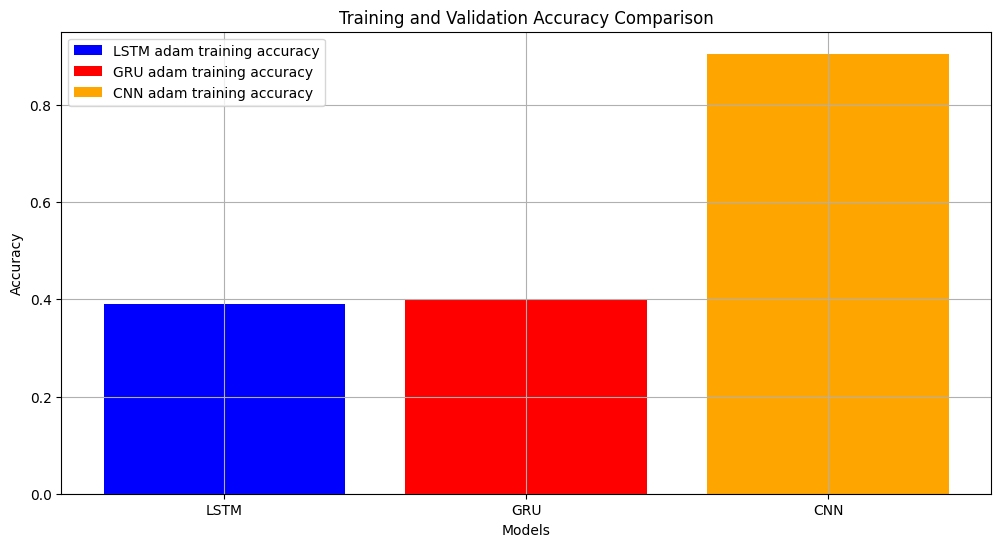

In [58]:
plt.figure(figsize=(12, 6))

# plt.plot(lstm_adam_history.history["accuracy"],
#          label="LSTM adam training accuracy", color='blue')
# plt.plot(lstm_adam_history.history["val_accuracy"],
#          label="LSTM adam validation accuracy", color='lightblue')

# plt.plot(gru_adam_history.history["accuracy"],
#          label="GRU adam training accuracy", color='green')
# plt.plot(gru_adam_history.history["val_accuracy"],
#          label="GRU adam validation accuracy", color='lightgreen')

# plt.plot(cnn_adam_history.history["accuracy"],
#          label="CNN adam training accuracy", color='orange')
# plt.plot(cnn_adam_history.history["val_accuracy"],
#          label="CNN adam validation accuracy", color='gold')

lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = lstm_adam_history.history["val_accuracy"]

gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = gru_adam_history.history["val_accuracy"]

cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = cnn_adam_history.history["val_accuracy"]

# epochs = range(1, len(lstm_adam_train_acc) + 1)
# print("epochs: ", epochs)
models = ['LSTM', 'GRU', 'CNN']
adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]
# bar_width = 0.2

# plt.bar(epochs, lstm_adam_train_acc, width=bar_width,
#         label="LSTM adam training accuracy", color='blue')
# plt.bar([e + bar_width for e in epochs], lstm_adam_val_acc, width=bar_width, label="LSTM adam validation accuracy", color='lightblue')

plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
        'GRU adam training accuracy', 'CNN adam training accuracy'], color=['blue', 'red', 'orange'])

# plt.bar([e + 1 * bar_width for e in epochs], gru_adam_train_acc,
#         width=bar_width, label="GRU adam training accuracy", color='red')

# plt.bar([e + 2 * bar_width for e in epochs], cnn_adam_train_acc,
#         width=bar_width, label="CNN adam training accuracy", color='orange')

plt.title("Training and Validation Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
# plt.xticks([e + 2 * bar_width for e in epochs], epochs)
plt.legend()
plt.grid(True)
plt.show()


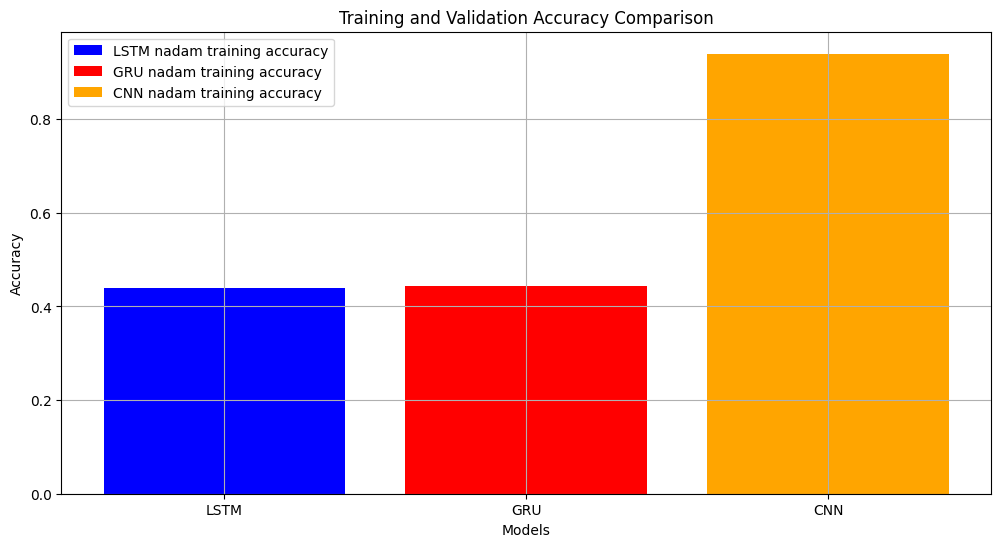

In [59]:
plt.figure(figsize=(12, 6))

# plt.plot(lstm_nadam_history.history["accuracy"],
#          label="LSTM nadam training accuracy", color='blue')
# plt.plot(lstm_nadam_history.history["val_accuracy"],
#          label="LSTM nadam validation accuracy", color='lightblue')

# plt.plot(gru_nadam_history.history["accuracy"],
#          label="GRU nadam training accuracy", color='green')
# plt.plot(gru_nadam_history.history["val_accuracy"],
#          label="GRU nadam validation accuracy", color='lightgreen')

# plt.plot(cnn_nadam_history.history["accuracy"],
#          label="CNN nadam training accuracy", color='orange')
# plt.plot(cnn_nadam_history.history["val_accuracy"],
#          label="CNN nadam validation accuracy", color='gold')

lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

nadam_accuracies = [lstm_nadam_train_acc,
                    gru_nadam_train_acc, cnn_nadam_train_acc]

# plt.bar(epochs, lstm_nadam_train_acc, width=bar_width,
#         label="LSTM nadam training accuracy", color='blue')

# plt.bar([e + 1 * bar_width for e in epochs], gru_nadam_train_acc,
#         width=bar_width, label="GRU nadam training accuracy", color='red')

# plt.bar([e + 2 * bar_width for e in epochs], cnn_nadam_train_acc,
#         width=bar_width, label="CNN nadam training accuracy", color='orange')

plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
        'GRU nadam training accuracy', 'CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
# plt.xticks([e + 2 * bar_width for e in epochs], epochs)
plt.legend()
plt.grid(True)
plt.show()


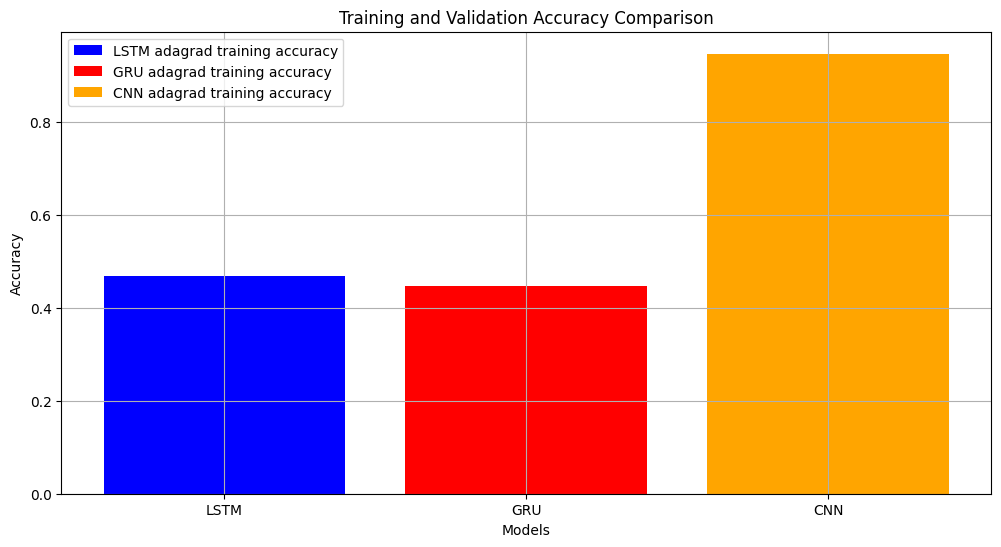

In [60]:
plt.figure(figsize=(12, 6))

# plt.plot(lstm_adagrad_history.history["accuracy"],
#          label="LSTM adagrad training accuracy", color='blue')
# plt.plot(lstm_adagrad_history.history["val_accuracy"],
#          label="LSTM adagrad validation accuracy", color='lightblue')

# plt.plot(gru_adagrad_history.history["accuracy"],
#          label="GRU adagrad training accuracy", color='green')
# plt.plot(gru_adagrad_history.history["val_accuracy"],
#          label="GRU adagrad validation accuracy", color='lightgreen')

# plt.plot(cnn_adagrad_history.history["accuracy"],
#          label="CNN adagrad training accuracy", color='orange')
# plt.plot(cnn_adagrad_history.history["val_accuracy"],
#          label="CNN adagrad validation accuracy", color='gold')

lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# plt.bar(epochs, lstm_adagrad_train_acc, width=bar_width,
#         label="LSTM adagrad training accuracy", color='blue')

# plt.bar([e + 1 * bar_width for e in epochs], gru_adagrad_train_acc,
#         width=bar_width, label="GRU adagrad training accuracy", color='red')

# plt.bar([e + 2 * bar_width for e in epochs], cnn_adagrad_train_acc,
#         width=bar_width, label="CNN adagrad training accuracy", color='orange')

adagrad_accuracies = [lstm_adagrad_train_acc,
                      gru_adagrad_train_acc, cnn_adagrad_train_acc]
plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
        'GRU adagrad training accuracy', 'CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
# plt.xticks([e + 2 * bar_width for e in epochs], epochs)
plt.legend()
plt.grid(True)
plt.show()


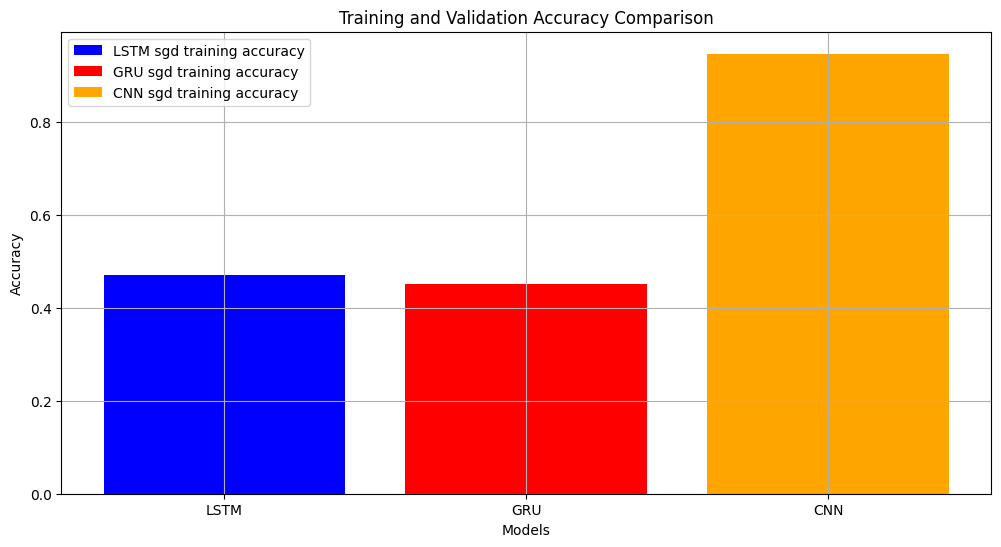

In [61]:
plt.figure(figsize=(12, 6))

lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

sgd_accuracies = [lstm_sgd_train_acc,
                  gru_sgd_train_acc, cnn_sgd_train_acc]
plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
        'GRU sgd training accuracy', 'CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


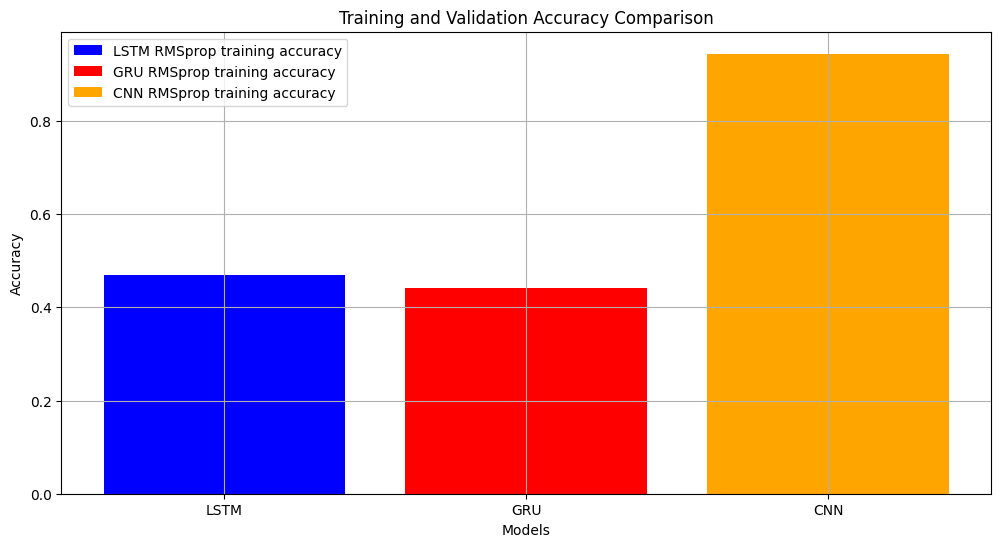

In [62]:
plt.figure(figsize=(12, 6))

lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
        'GRU RMSprop training accuracy', 'CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
